# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 데이터 나누기

In [4]:
# 데이터타입 확인

data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
# 데이터타입 변경

data['datetime'] = data['datetime'].astype('datetime64')

In [6]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

In [8]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


#### 년, 월, 날, 시간 어느 때가 가장 사용량이 많을까? 그래프 구성


# 가설 설정 (Hypothesis)
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 가설 1. 시간대별 수요량의 증감관계
- 출근(08 ~ 10시)시간에 수요량이 증가
- 퇴근(17 ~ 19시)시간에 수요량이 증가
- 공백 시간(10 ~ 17시)에는 누가 주로 수요를 하는가?
- 버스나 지하철이 끊기는 시간에 사용량이 있을 것이다. 

### 가설 2. 휴일과 출근시간 수요량의 관계 
- 휴일에는 (쉬면서 자전거를 즐길 낮시간 임시이용자 수요량 증가)
  휴일에는 출퇴근 시간이 아닐 때에도 이용량이 많을 것이다. 
- 평일에는 (출퇴근 시간만 수요량이 증가)

### 가설 2-1. 경영마인드, 등록회원, 캐주얼(비회원) 수요 일자 
- 출퇴근 시간에는 등록된 회원의 이용 수가 많을 것이다. 
- 휴일에는 임시회원의 수가 많을 것이다. 


### 가설 3. 년, 월, 날, 시간 어느 때가 가장 사용량이 많을까?

- 추운 겨울보다 봄, 여름, 가을에 사용량이 많을 것이다.(계절)


### 가설 4. 기상과 수요량의 관계 

- 자전거를 타기 좋은 날씨인가? = 걷기 좋지 않은 날씨인가?
- 날씨가 덥고(30도씨 이상) 습도가 높을수록(60% 이상)일수록 수요량은 증가할 것이다.
- 날씨가 1,2 범주일 때 사용량이 많을 것이다. (날씨)
- 기온이 낮고, 체감온도가 낮으면 이용량이 없을 것이다.    


### 가설 5. 풍량과 수요량 하락세의 관계
- 비가 오거나(Humidity 80% 이상), 풍량(windspeed)이 증가 할 때 자전거를 이용하는 자가 있는가?
- 여전히 이용하는 사용자가 있다면 그에 대한 개선사항이 요구됨.
   

[Text(0.5, 0, 'hour')]

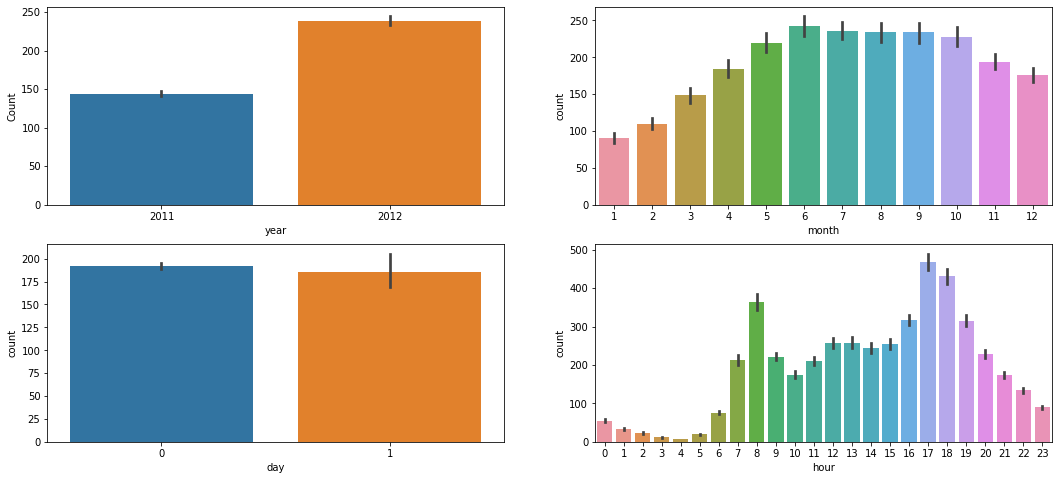

In [33]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악


figure, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

#년도와 count
sns.barplot(data=data, x="year", y="count", ax=ax1)

#month와 count
sns.barplot(data=data, x="month", y="count", ax=ax2)

#day와 count
sns.barplot(data=data, x="holiday", y="count", ax=ax3)

#hour와 count
sns.barplot(data=data, x="hour", y="count", ax=ax4)

ax1.set(ylabel='Count')#,title="year_count")
ax2.set(xlabel='month')#,title="month_count")
ax3.set(xlabel='day')#, title="day_count")
ax4.set(xlabel='hour')#, title="hour_count")


# #년도와 count
# sns.barplot(x='season', y='count', data=data)

# fig = plt.figure(figsize=[12,10])
# ax1 = fig.add_subplot(2,2,1)
# ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())

# #month와 count
# ax2 = fig.add_subplot(2,2,2)
# ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

# #day와 count
# ax3 = fig.add_subplot(2,2,3)
# ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

# #hour와 count
# ax4 = fig.add_subplot(2,2,4)
# ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

[Text(0.5, 0, 'weather')]

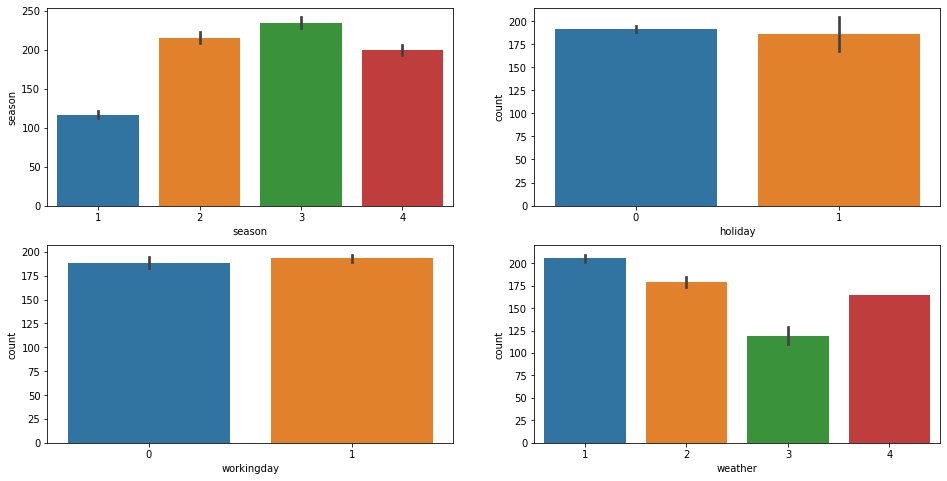

In [27]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

figure, ((ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(16,8)

#계절과 count
sns.barplot(data=data, x="season", y="count", ax=ax5)

#휴일 여부와 count
sns.barplot(data=data, x="holiday", y="count", ax=ax6)

#작업일 여부와 count
sns.barplot(data=data, x="workingday", y="count", ax=ax7)

#날씨와 count
sns.barplot(data=data, x="weather", y="count", ax=ax8)

ax5.set(ylabel='season')#,title="season_count")
ax6.set(xlabel='holiday')#,title="holiday_count")
ax7.set(xlabel='workingday')#, title="workingday_count")
ax8.set(xlabel='weather')#, title="weather_count")


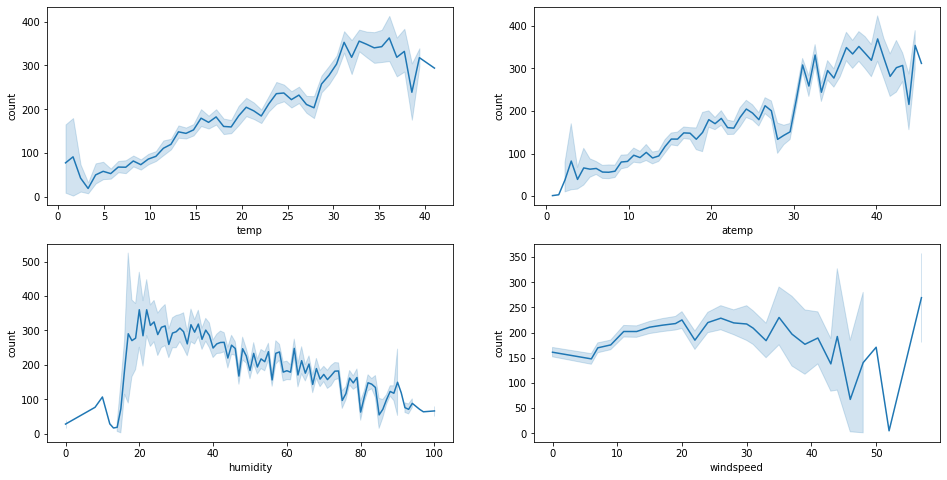

In [32]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

# 온도와 대여량 간의 상관관계 
figure, ((ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(16,8)

#온도과 count
sns.lineplot(x='temp', y = 'count', data=data, ax=ax5)
#체감온도과 count
sns.lineplot(x='atemp', y = 'count', data=data, ax=ax6)
# 습도와 count
sns.lineplot(x='humidity', y = 'count', data=data, ax=ax7)
#바람과 count
sns.lineplot(x='windspeed' , y = 'count', data=data, ax=ax8)

#한 그래프 안에 넣어주고 싶다면 그냥 일렬로 함! 
# 그러니까 ax값을 넣어주지 않고 그래프를 만들면 됨. 

# sns.lineplot(x='temp', y = 'count', data=data)
# sns.lineplot(x='atemp', y = 'count', data=data)
# sns.lineplot(x='humidity', y = 'count', data=data)
# sns.lineplot(x='windspeed' , y = 'count', data=data)


#이 수식은 하나의 스트링이라고 생각한 후에 숫자값을 주어서 코드를 만든 것- 다른 분이 한 것 따옴
# f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
# sns.scatterplot(x='temp', y = 'count', data=data, ax = axes[0])
# sns.scatterplot(x='atemp', y = 'count', data=data, ax = axes[1])
# f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
# sns.regplot(x='temp', y = 'count', data=data, line_kws={'color': 'red'}, ax=axes[0])
# sns.regplot(x='atemp', y = 'count', data=data, line_kws={'color': 'red'}, ax=axes[1])

# 가설 검증 하기 

### 가설 1. 시간대별 수요량의 증감관계
- 출근(08 ~ 10시)시간에 수요량이 증가
- 퇴근(17 ~ 19시)시간에 수요량이 증가
- 공백 시간(10 ~ 17시)에는 누가 주로 수요를 하는가? 
- 버스나 지하철이 끊기는 시간에 사용량이 있을 것이다. -->기록에 나오지 않음


In [ ]:
figure, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(13,8)

# 회원등록자 count
sns.barplot(data=data, x="hour", y="registered", ax=ax1)

# 캐주얼 사용자 count
sns.barplot(data=data, x="hour", y="casual", ax=ax2)

# 합친 것
sns.barplot(x = 'hour', y='count', data=data, hue = 'workingday')

# -->위와 같은 말.. 
## Set up the matplotlib figure
# f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=False)
# y1 = data.casual
# # Generate some sequential data
# x = np.array(data['hour'])
# sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
# ax1.axhline(40, color="g", clip_on=False)
# ax1.set_ylabel("Casual")
# y2 = data.registered
# # Center the data to make it diverging
# sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
# ax2.axhline(200, color="g", clip_on=False)
# ax2.set_ylabel("Registered")


- 회원 등록자의 경우, 출근 시간인 7 ~ 9시까지, 퇴근시간인 17 ~ 20시까지 이용량이 많았음
- 비회원인 경우, 약10시부터 저녁20시까지 출퇴근 시간 사이로 이용량이 많았음 
- 또한 사용량이 가장 적은 시간대로는 오전3시~ 5시 사이로 자전거 점검시간을 하면 좋을 것으로 예상 됨
- 비회원을 회원으로 유도하기 위해서 낮시간에 이용하는 비직장인들을 위한 서비스를 추가 마케팅해야 함

  예를들어, 장을 보는 아주머니 이용자: 장바구니를 설치하여 시장볼 때 편리성을 두기 
  학생들을 위한 낮은 자전거 만들어 제공  
- 잘 이용하지 않는 시간인 심야 시간 자전거 회원 이용 특가 상품 만들기 
- 국가와 협업 등/ 자전거 이용 캠페인을 적극적으로 나서기, 자전거 교실을 협업하여 만들어 운영하기 


### 가설 2. 휴일과 출근시간 수요량의 관계 
- 휴일에는 (쉬면서 자전거를 즐길 낮시간 임시이용자 수요량 증가)
  휴일에는 출퇴근 시간이 아닐 때에도 이용량이 많을 것이다. 
- 평일에는 (출퇴근 시간만 수요량이 증가)

In [ ]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20,5)

# 휴일 count
sns.barplot(data=data, x="hour", y="holiday", ax=ax1)

# 평일시간 count
sns.barplot(data=data, x="hour", y="workingday", ax=ax2)


 가설 설정과 달리, 평일 사용량이 오히려 휴일사용량보다 많음
 휴일에는 여행이라던지, 다른 사유 때문에 자전거 이용이 낮을 수도 있다고 추측 함
 따라서 휴일에 자전거 사용량을 늘리기 위한 마케팅 작업을 하면 좋을 것. 
 예를 들어 휴일에는 자전거를 멀리 빌리는 것이 가능하도록 하여, 자전거로 둘레길이나 아름다운 장관이 펼쳐진 곳에서 자전거를 탈 수 있도록 장려하기 

### 가설 3. 년, 월, 날, 시간 어느 때가 가장 사용량이 많을까?

- 추운 겨울보다 봄, 여름, 가을에 사용량이 많을 것이다.(계절)


In [ ]:
figure,(ax1,ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(15,7)

#계절과 count
sns.swarmplot(data=data, x="season", y="count", ax=ax1)

#날씨와 count
sns.swarmplot(data=data, x="weather", y="count", ax=ax2)

#계절과 날씨! 
sns.swarmplot(data=data, x="weather", y="season", ax=ax3)

 보시는 봐와 같이, 봄, 여름, 가을에 사용량이 많았음
 

### 가설 4. 기상과 수요량의 관계 

- 자전거를 타기 좋은 날씨인가? = 걷기 좋지 않은 날씨인가?
- 날씨가 덥고(30도씨 이상) 습도가 높을수록(60% 이상)일수록 수요량은 증가할 것이다.
- 날씨가 1,2 범주일 때 사용량이 많을 것이다. (날씨)
- 기온이 낮고, 체감온도가 낮으면 이용량이 없을 것이다.    

In [ ]:
# 온도와 대여량 간의 상관관계 -->공부하기 내 방식대로 위처럼 쓴는 법 공부!!!!!!!!!!!!!!!!!!!!!
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot(data.temp, ax = axes[0])
sns.distplot(data.atemp, ax = axes[1])
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot(data.humidity, ax = axes[0])
sns.distplot(data.windspeed, ax = axes[1])

### 가설 5. 풍량과 수요량 하락세의 관계
- 비가 오거나(Humidity습도 80% 이상), 풍량(windspeed)이 증가 할 때 자전거를 이용하는 자가 있는가?
- 여전히 이용하는 사용자가 있다면 그에 대한 개선사항이 요구됨.

In [ ]:
# 임시 대여자- 풍량과 습도 수요량
windspeed_casual = sns.scatterplot(x=data.windspeed, y=data.humidity, data=data, hue=data.casual)


In [ ]:
# 회원 대여자- 풍량과 습도 수요량
reg_growth = sns.scatterplot(x=data.humidity, y=data.atemp, data=data, hue=data.registered)

- 기온이 30도 이상일때 이용자 수가 급증하며, 평균 습도보다 낮은 20%의 습도에도 이용자가 늘어나는 것으로 보아 증가세와 습도는 크게 관련이 없는 것으로 보인다.
- 반면, 기온이 30도 이상 & 습도가 80% 이상일 때, 모든 회원들의 수요량이 줄어드는 것은 우천이므로 자전거를 탈 수 없는 것으로 보인다.
- 우천 시 운영하기 좋은 지붕이 있는 전기 스쿠터 렌트 추가사업 확장에 대한 고려